In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Lecture csv

In [21]:
df_client=pd.read_csv('Client.csv')
df_produit=pd.read_csv('Produit.csv')
df_vente=pd.read_csv('Vente& Facture.csv')
df_depence=pd.read_csv('Dépence & Charge.csv')
df_budget=pd.read_csv('Budget_Mensuelles.csv')
df_categorie=pd.read_csv('Mapping catégories → comptes.csv')



In [22]:
#Table quality summary (missing + duplicates)
dfs = {
    "client": df_client,
    "produit": df_produit,
    "vente": df_vente,
    "depence": df_depence,
    "budget": df_budget,
    "categorie": df_categorie
}

summary = []
for name, df in dfs.items():
    summary.append({
        "table": name,
        "rows": df.shape[0],
        "cols": df.shape[1],
        "missing_cells": int(df.isna().sum().sum()),
        "duplicates_rows": int(df.duplicated().sum())
    })

summary_df = pd.DataFrame(summary)
display(summary_df)

,table,rows,cols,missing_cells,duplicates_rows
0,client,120,5,0,0
1,produit,35,4,0,0
2,vente,26121,10,0,0
3,depence,4852,8,0,0
4,budget,840,4,0,0
5,categorie,10,4,0,0


In [23]:
keys = {
    "client": ["customer_id"],
    "produit": ["product_id"],
    "vente": ["invoice_id"],
    "depence": ["expense_id"],
    "budget": ["month", "category", "department"],
    "categorie": ["category", "department"]
}

for table, cols in keys.items():
    df = dfs[table]
    print(table, "duplicates on keys =", df.duplicated(subset=cols).sum())

client duplicates on keys = 0
produit duplicates on keys = 0
vente duplicates on keys = 0
depence duplicates on keys = 0
budget duplicates on keys = 0
categorie duplicates on keys = 0


In [24]:
display("Information Sur Table Client:\n",df_client.info())
display("Information Sur Table Produit:\n",df_produit.info())
display("Information Sur Table Vente:\n",df_vente.info())
display("Information Sur Table Depence:\n",df_depence.info())
display("Information Sur Table Budget:\n",df_budget.info())
display("Information Sur Table Categorie:\n",df_categorie.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    120 non-null    object
 1   customer_name  120 non-null    object
 2   country_iso3   120 non-null    object
 3   segment        120 non-null    object
 4   created_date   120 non-null    object
dtypes: object(5)
memory usage: 4.8+ KB


'Information Sur Table Client:\n'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      35 non-null     object 
 1   product_name    35 non-null     object 
 2   category        35 non-null     object 
 3   unit_price_eur  35 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


'Information Sur Table Produit:\n'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26121 entries, 0 to 26120
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                26121 non-null  object 
 1   invoice_id          26121 non-null  object 
 2   customer_id         26121 non-null  object 
 3   product_id          26121 non-null  object 
 4   qty                 26121 non-null  int64  
 5   unit_price_eur      26121 non-null  float64
 6   discount_rate       26121 non-null  float64
 7   total_eur           26121 non-null  float64
 8   currency            26121 non-null  object 
 9   payment_terms_days  26121 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 2.0+ MB


'Information Sur Table Vente:\n'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   expense_id  4852 non-null   object 
 1   date        4852 non-null   object 
 2   category    4852 non-null   object 
 3   department  4852 non-null   object 
 4   vendor      4852 non-null   object 
 5   amount_mad  4852 non-null   float64
 6   currency    4852 non-null   object 
 7   type        4852 non-null   object 
dtypes: float64(1), object(7)
memory usage: 303.4+ KB


'Information Sur Table Depence:\n'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              840 non-null    object 
 1   category           840 non-null    object 
 2   department         840 non-null    object 
 3   budget_amount_mad  840 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.4+ KB


'Information Sur Table Budget:\n'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       10 non-null     object
 1   department     10 non-null     object
 2   account_code   10 non-null     int64 
 3   account_label  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


'Information Sur Table Categorie:\n'

None

In [25]:

display("Les 5 Premieres lignes de dataframe client:\n", df_client.head())
display("Les 5 Premieres lignes de dataframe produit:\n", df_produit.head())
display("Les 5 Premieres lignes de dataframe vente:\n", df_vente.head())
display("Les 5 Premieres lignes de dataframe depence:\n", df_depence.head())
display("Les 5 Premieres lignes de dataframe budget:\n", df_budget.head())
display("Les 5 Premieres lignes de dataframe categoie:\n", df_categorie.head())


'Les 5 Premieres lignes de dataframe client:\n'

,customer_id,customer_name,country_iso3,segment,created_date
0,C0001,Client 1,USA,SMB,2018-03-02
1,C0002,Client 2,FRA,SMB,2024-02-15
2,C0003,Client 3,DZA,Retail,2017-10-03
3,C0004,Client 4,USA,Retail,2023-10-07
4,C0005,Client 5,MAR,Retail,2020-02-04


'Les 5 Premieres lignes de dataframe produit:\n'

,product_id,product_name,category,unit_price_eur
0,P001,Produit 1,Training,508.53
1,P002,Produit 2,Subscription,91.99
2,P003,Produit 3,Service,422.80
3,P004,Produit 4,Service,265.70
4,P005,Produit 5,Training,609.82


'Les 5 Premieres lignes de dataframe vente:\n'

,date,invoice_id,customer_id,product_id,qty,unit_price_eur,discount_rate,total_eur,currency,payment_terms_days
0,2019-01-01,INV00000001,C0077,P010,1,149.74,0.0624,140.40,EUR,15
1,2019-01-01,INV00000002,C0011,P033,2,1052.88,0.0328,2036.65,EUR,45
2,2019-01-01,INV00000003,C0044,P028,3,273.69,0.1121,729.04,EUR,15
3,2019-01-01,INV00000004,C0033,P030,1,139.26,0.1502,118.34,EUR,30
4,2019-01-01,INV00000005,C0066,P001,2,508.53,0.0000,1017.06,EUR,30


'Les 5 Premieres lignes de dataframe depence:\n'

,expense_id,date,category,department,vendor,amount_mad,currency,type
0,EXP000000001,2019-01-01,Rent,Facilities,Office landlord,11892.93,MAD,Fixed
1,EXP000000002,2019-01-01,Software,IT,Microsoft,4235.23,MAD,Fixed
2,EXP000000003,2019-01-01,Travel,Operations,Meta,1307.46,MAD,Variable
3,EXP000000004,2019-01-02,ProfessionalServices,Admin,Local supplier,1060.42,MAD,Variable
4,EXP000000005,2019-01-02,Logistics,Operations,Tax authority,692.28,MAD,Variable


'Les 5 Premieres lignes de dataframe budget:\n'

,month,category,department,budget_amount_mad
0,2019-01-01,Salaries,RH,43637.41
1,2019-01-01,Rent,Facilities,12110.32
2,2019-01-01,Utilities,Facilities,1520.34
3,2019-01-01,Marketing,Growth,7956.21
4,2019-01-01,Software,IT,6457.25


'Les 5 Premieres lignes de dataframe categoie:\n'

,category,department,account_code,account_label
0,Salaries,RH,6000,Compte Salaries
1,Rent,Facilities,6001,Compte Rent
2,Utilities,Facilities,6002,Compte Utilities
3,Marketing,Growth,6003,Compte Marketing
4,Software,IT,6004,Compte Software


Checks d’intégrité référentielle (facts → dimensions)

In [26]:
# sales -> customers/products
missing_customers = set(df_vente["customer_id"]) - set(df_client["customer_id"])
missing_products  = set(df_vente["product_id"]) - set(df_produit["product_id"])

print("Missing customers in sales:", len(missing_customers))
print("Missing products in sales:", len(missing_products))

# expenses/budget -> mapping category+department
map_keys = set(zip(df_categorie["category"], df_categorie["department"]))
missing_exp = set(zip(df_depence["category"], df_depence["department"])) - map_keys
missing_bud = set(zip(df_budget["category"], df_budget["department"])) - map_keys

print("Missing mapping for expenses:", len(missing_exp))
print("Missing mapping for budget:", len(missing_bud))

Missing customers in sales: 0
Missing products in sales: 0
Missing mapping for expenses: 0
Missing mapping for budget: 0


In [27]:
#Détection d’anomalies
df_vente[df_vente["total_eur"] > df_vente["total_eur"].quantile(0.99)]

,date,invoice_id,customer_id,product_id,qty,unit_price_eur,discount_rate,total_eur,currency,payment_terms_days
39,2019-01-05,INV00000040,C0116,P018,5,985.92,0.0386,4739.22,EUR,45
74,2019-01-09,INV00000075,C0064,P026,4,1216.68,0.0599,4575.22,EUR,45
134,2019-01-15,INV00000135,C0031,P026,4,1216.68,0.0518,4614.52,EUR,30
197,2019-01-22,INV00000198,C0086,P008,6,1134.56,0.0648,6366.57,EUR,30
214,2019-01-25,INV00000215,C0013,P026,4,1216.68,0.0000,4866.72,EUR,15
...,...,...,...,...,...,...,...,...,...,...
25760,2025-12-01,INV00025761,C0019,P008,4,1134.56,0.0082,4501.16,EUR,45
25814,2025-12-06,INV00025815,C0116,P026,5,1216.68,0.1014,5466.85,EUR,60
25899,2025-12-13,INV00025900,C0026,P033,5,1052.88,0.0009,5259.77,EUR,0
26054,2025-12-26,INV00026055,C0036,P008,4,1134.56,0.0079,4502.20,EUR,15


In [28]:
df_depence[df_depence["amount_mad"] > df_depence["amount_mad"].quantile(0.99)]

,expense_id,date,category,department,vendor,amount_mad,currency,type
50,EXP000000051,2019-01-30,Salaries,RH,Payroll,50272.54,MAD,Fixed
108,EXP000000109,2019-02-28,Salaries,RH,Payroll,49070.17,MAD,Fixed
171,EXP000000172,2019-03-30,Salaries,RH,Payroll,50972.90,MAD,Fixed
562,EXP000000563,2019-10-30,Salaries,RH,Payroll,55348.48,MAD,Fixed
563,EXP000000564,2019-10-31,Salaries,RH,Payroll,50676.64,MAD,Fixed
599,EXP000000600,2019-11-28,Salaries,RH,Payroll,51741.54,MAD,Fixed
665,EXP000000666,2019-12-31,Salaries,RH,Payroll,52235.37,MAD,Fixed
881,EXP000000882,2020-04-30,Salaries,RH,Payroll,53275.76,MAD,Fixed
1003,EXP000001004,2020-06-28,Salaries,RH,Payroll,50267.08,MAD,Fixed
1057,EXP000001058,2020-07-31,Salaries,RH,Payroll,54630.94,MAD,Fixed


In [29]:
#Cohérence métier
df_vente["calc_total"] = df_vente["qty"] * df_vente["unit_price_eur"] * (1 - df_vente["discount_rate"])
df_vente["diff"] = abs(df_vente["total_eur"] - df_vente["calc_total"])
df_vente["diff"].describe()

count    26121.000000
mean         0.021984
std          0.029790
min          0.000000
25%          0.004032
50%          0.011768
75%          0.027716
max          0.393056
Name: diff, dtype: float64

In [30]:
#KPI 1: CA total + CA mensuel (EUR)
df_vente["date"] = pd.to_datetime(df_vente["date"], errors="coerce")
df_vente["month"] = df_vente["date"].dt.to_period("M").dt.to_timestamp()

ca_total = df_vente["total_eur"].sum()
print("CA TOTAL (EUR) =", ca_total)

ca_month = df_vente.groupby("month", as_index=False)["total_eur"].sum()
display(ca_month.head())

CA TOTAL (EUR) = 23110957.64


,month,total_eur
0,2019-01-01,270325.26
1,2019-02-01,241463.08
2,2019-03-01,267569.89
3,2019-04-01,296383.88
4,2019-05-01,274617.63


In [31]:
#KPI 2: Dépenses mensuelles (MAD)
df_depence["date"] = pd.to_datetime(df_depence["date"], errors="coerce")
df_depence["month"] = df_depence["date"].dt.to_period("M").dt.to_timestamp()

dep_month = df_depence.groupby("month", as_index=False)["amount_mad"].sum()
display(dep_month.head())

,month,amount_mad
0,2019-01-01,199906.63
1,2019-02-01,108928.18
2,2019-03-01,214365.18
3,2019-04-01,158205.22
4,2019-05-01,194285.47


In [32]:
#KPI 3: Budget vs Réalisé (MAD)
df_budget["month"] = pd.to_datetime(df_budget["month"], errors="coerce")
df_budget["month"] = df_budget["month"].dt.to_period("M").dt.to_timestamp()

bud_month = df_budget.groupby("month", as_index=False)["budget_amount_mad"].sum()

budget_vs = bud_month.merge(dep_month, on="month", how="outer").fillna(0)
budget_vs["variance_mad"] = budget_vs["amount_mad"] - budget_vs["budget_amount_mad"]
budget_vs["variance_pct"] = np.where(
    budget_vs["budget_amount_mad"] == 0,
    np.nan,
    budget_vs["variance_mad"] / budget_vs["budget_amount_mad"]
)

display(budget_vs.head())

,month,budget_amount_mad,amount_mad,variance_mad,variance_pct
0,2019-01-01,82532.38,199906.63,117374.25,1.422160
1,2019-02-01,80947.61,108928.18,27980.57,0.345663
2,2019-03-01,82181.45,214365.18,132183.73,1.608438
3,2019-04-01,79772.87,158205.22,78432.35,0.983196
4,2019-05-01,87732.32,194285.47,106553.15,1.214526


In [33]:
#CA par segment
df_sales_seg = df_vente.merge(df_client[["customer_id","segment"]], on="customer_id")
df_sales_seg.groupby("segment")["total_eur"].sum()

segment
Enterprise     3707224.47
Retail        11595721.33
SMB            7808011.84
Name: total_eur, dtype: float64

In [34]:
#CA par pays
df_sales_country = df_vente.merge(df_client[["customer_id","country_iso3"]], on="customer_id")
df_sales_country.groupby("country_iso3")["total_eur"].sum()

country_iso3
CAN    1111972.12
DEU    1525275.61
DZA    1129155.24
ESP     613314.06
FRA    3979008.44
GBR    2149167.79
MAR    7535711.98
SEN    1153223.65
USA    3914128.75
Name: total_eur, dtype: float64

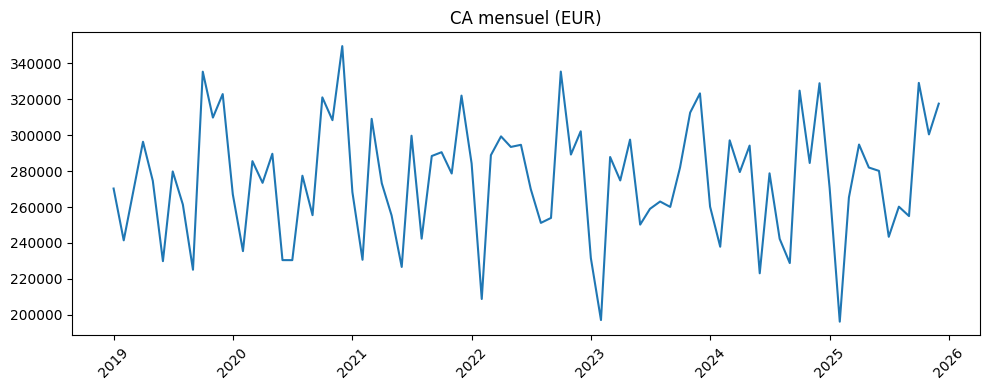

In [35]:
#Graph 1: CA mensuel
plt.figure(figsize=(10,4))
plt.plot(ca_month["month"], ca_month["total_eur"])
plt.title("CA mensuel (EUR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

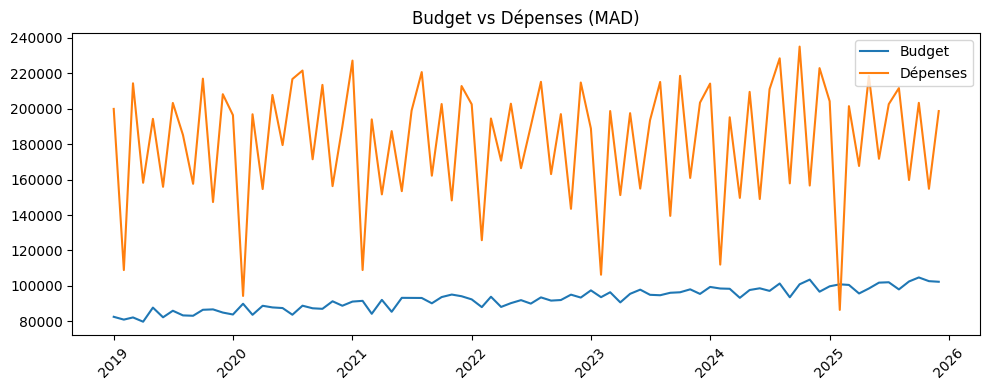

In [36]:
#Graph 2: Budget vs Dépenses
plt.figure(figsize=(10,4))
plt.plot(budget_vs["month"], budget_vs["budget_amount_mad"], label="Budget")
plt.plot(budget_vs["month"], budget_vs["amount_mad"], label="Dépenses")
plt.title("Budget vs Dépenses (MAD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,customer_id,total_eur
8,C0009,244290.36
86,C0087,236122.28
77,C0078,235374.23
50,C0051,230451.43
102,C0103,227945.31
29,C0030,227548.50
42,C0043,226721.83
76,C0077,226289.95
55,C0056,224059.95
62,C0063,220202.45


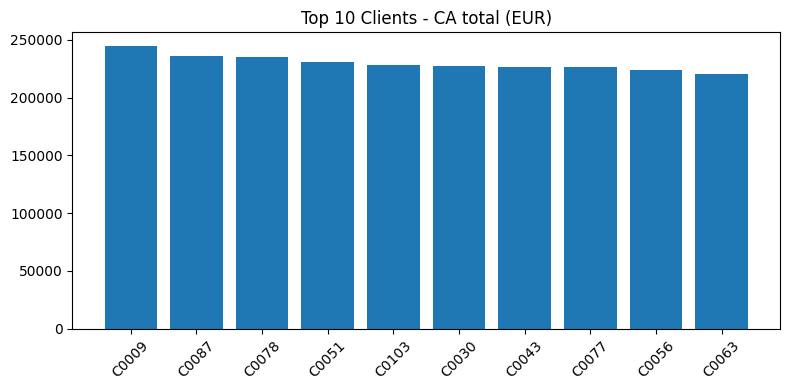

In [37]:
# Top 10 clients (CA total)
top_clients = (
    df_vente.groupby("customer_id", as_index=False)["total_eur"]
    .sum()
    .sort_values("total_eur", ascending=False)
    .head(10)
)

display(top_clients)

# Plot
plt.figure(figsize=(8,4))
plt.bar(top_clients["customer_id"].astype(str), top_clients["total_eur"])
plt.title("Top 10 Clients - CA total (EUR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,product_id,total_eur
25,P026,1763006.62
7,P008,1732189.83
17,P018,1551778.67
32,P033,1513404.31
30,P031,1360680.06
19,P020,1113972.92
20,P021,1111135.78
28,P029,977849.05
4,P005,868726.49
0,P001,747633.71


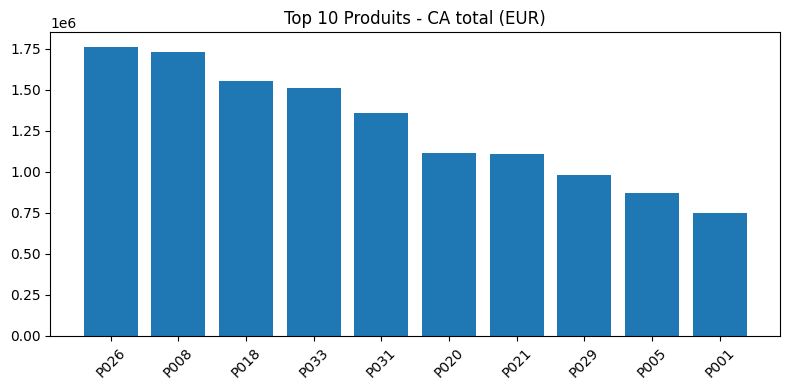

In [38]:
# Top 10 produits (CA total)
top_products = (
    df_vente.groupby("product_id", as_index=False)["total_eur"]
    .sum()
    .sort_values("total_eur", ascending=False)
    .head(10)
)

display(top_products)

# Plot
plt.figure(figsize=(8,4))
plt.bar(top_products["product_id"].astype(str), top_products["total_eur"])
plt.title("Top 10 Produits - CA total (EUR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,type,amount_mad
0,Fixed,10912996.74
1,Variable,4342360.32


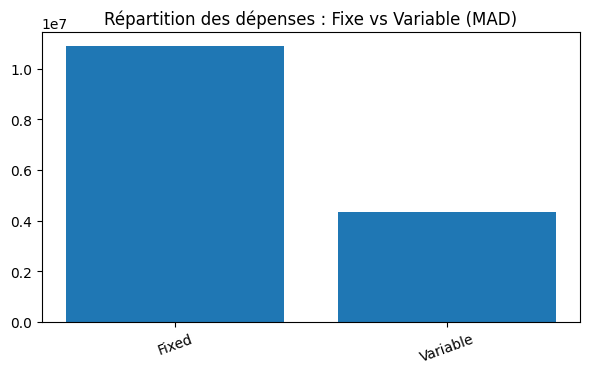

,month,type,amount_mad
0,2019-01-01,Fixed,148466.43
1,2019-01-01,Variable,51440.20
2,2019-02-01,Fixed,67508.86
3,2019-02-01,Variable,41419.32
4,2019-03-01,Fixed,153394.99


In [39]:
# Répartition globale fixe/variable
fix_var = (
    df_depence.groupby("type", as_index=False)["amount_mad"]
    .sum()
    .sort_values("amount_mad", ascending=False)
)

display(fix_var)

# Plot
plt.figure(figsize=(6,4))
plt.bar(fix_var["type"].astype(str), fix_var["amount_mad"])
plt.title("Répartition des dépenses : Fixe vs Variable (MAD)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Bonus: Fixe vs Variable par mois
fix_var_month = (
    df_depence.groupby(["month", "type"], as_index=False)["amount_mad"]
    .sum()
)

display(fix_var_month.head())

In [40]:
#Top fournisseurs
top_vendors = (
    df_depence.groupby("vendor", as_index=False)["amount_mad"]
    .sum()
    .sort_values("amount_mad", ascending=False)
    .head(10)
)

display(top_vendors)

,vendor,amount_mad
13,Payroll,9375935.87
11,Office landlord,1332691.56
9,Microsoft,484971.42
0,AWS,468358.41
4,Google,459919.04
6,Local supplier,347892.46
5,KPMG,335328.19
1,Air Maroc,321616.24
2,DHL,321545.43
7,Maroc Telecom,319144.99


In [41]:
df_vente.describe()
df_depence.describe()

,date,amount_mad,month
count,4852,4852.000000,4852
mean,2022-07-06 03:06:58.466611456,3144.137894,2022-06-21 06:34:25.622423808
min,2019-01-01 00:00:00,50.000000,2019-01-01 00:00:00
25%,2020-10-13 00:00:00,514.935000,2020-10-01 00:00:00
50%,2022-07-06 00:00:00,983.735000,2022-07-01 00:00:00
75%,2024-04-01 00:00:00,1522.932500,2024-04-01 00:00:00
max,2025-12-31 00:00:00,64082.820000,2025-12-01 00:00:00
std,NaN,9080.024641,NaN


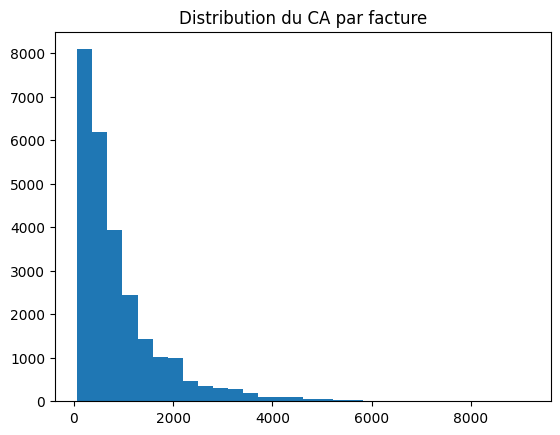

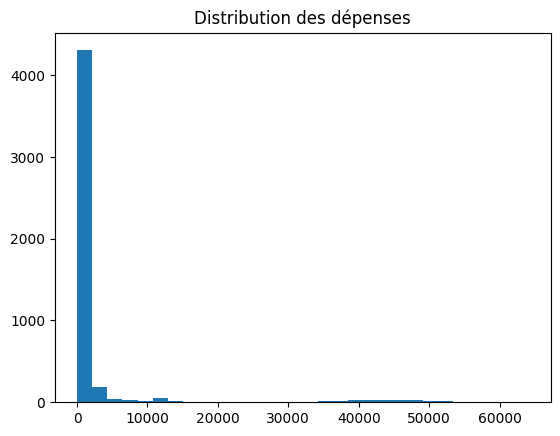

In [29]:
plt.figure()
plt.hist(df_vente["total_eur"], bins=30)
plt.title("Distribution du CA par facture")
plt.show()

plt.figure()
plt.hist(df_depence["amount_mad"], bins=30)
plt.title("Distribution des dépenses")
plt.show()

Test-Satistique

In [42]:
from scipy.stats import ttest_ind

# CA mensuel
ca_month = df_vente.groupby("month", as_index=False)["total_eur"].sum()
ca_month["quarter"] = ca_month["month"].dt.quarter

q4 = ca_month.loc[ca_month["quarter"] == 4, "total_eur"]
not_q4 = ca_month.loc[ca_month["quarter"] != 4, "total_eur"]

# t-test (Welch)
t_stat, p_value = ttest_ind(q4, not_q4, equal_var=False, nan_policy="omit")

print("=== T-TEST Q4 vs autres trimestres ===")
print("Moyenne Q4:", round(q4.mean(),2))
print("Moyenne hors Q4:", round(not_q4.mean(),2))
print("t-stat:", round(t_stat,4))
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Différence significative: Q4 est différent (souvent plus élevé).")
else:
    print("❌ Pas de différence significative entre Q4 et le reste.")

=== T-TEST Q4 vs autres trimestres ===
Moyenne Q4: 312820.71
Moyenne hors Q4: 262567.03
t-stat: 9.2215
p-value: 4.348215407039965e-12
✅ Différence significative: Q4 est différent (souvent plus élevé).


In [43]:
#Correlation Ventes vs Dépenses
merged = ca_month.merge(dep_month, on="month")

correlation = merged["total_eur"].corr(merged["amount_mad"])

print("Correlation:", correlation)

Correlation: 0.47130951256082243


In [44]:
#t-test Enterprise
df_sales_seg = df_vente.merge(df_client[["customer_id","segment"]], on="customer_id")

enterprise = df_sales_seg[df_sales_seg["segment"]=="Enterprise"]["total_eur"]
others = df_sales_seg[df_sales_seg["segment"]!="Enterprise"]["total_eur"]

t_stat, p_value = ttest_ind(enterprise, others, equal_var=False)

print("p-value:", p_value)

p-value: 0.3320384652325514


In [45]:
# test Chi²
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df_depence["department"], df_depence["type"])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("p-value:", p)

p-value: 0.0
